In [213]:
%matplotlib inline

from statsbombpy import sb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import os

from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from mplsoccer.utils import FontManager
import seaborn as sns
from matplotlib.colors import to_rgba, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects
import matplotsoccer

from PIL import Image

from urllib.request import urlopen, urlretrieve
from highlight_text import HighlightText, ax_text, fig_text
import requests
from io import BytesIO
import cmasher as cmr
from scipy.spatial  import ConvexHull
from scipy import stats

In [214]:
pd.options.display.max_columns = 500

In [215]:
df = sb.events(match_id=3835329)

In [216]:
im = Image.open(r"C:\Users\Gusse\OneDrive\Dokumenter\Python\Womens Euro 2022\sb_text_logo.png")

In [303]:
allshots = pd.read_csv("allshots.csv")
allshots = allshots[['minute', 'team', 'shot_statsbomb_xg', 'player', 'shot_outcome',]]
allshots = allshots.sort_values(by =['team', 'minute'], ascending = [True, True])
allshots = allshots.drop('index', axis=1).reset_index()

KeyError: "['index'] not found in axis"

In [301]:
allshots.columns

Index(['index', 'minute', 'team', 'shot_statsbomb_xg', 'player',
       'shot_outcome'],
      dtype='object')

In [218]:
allgoals = pd.read_csv("goals.csv")

In [219]:
pitchColor = "#7FB069"
figColor = "#7FB069"
linesColor = "black"
hteamColor = "#E32219"
ateamColor = "#003581"
MVP = 10108
MVPname = "Pernille Harder"
tournament = "Women's EURO 2022"
textColor = "black"
hteam = allshots["team"].iloc[0]
ateam = allshots["team"].iloc[-1]
pitchCmap = LinearSegmentedColormap.from_list("pitch heatmap", ["#7FB069",hteamColor], N=100)

In [220]:
def nums_cumulative_sum(nums_list):
    return [sum(nums_list[:i+1]) for i in range(len(nums_list))]
h_cumulative = nums_cumulative_sum(h_Xg)
a_cumulative = nums_cumulative_sum(a_Xg)

In [221]:
a_Xg = [0]
h_Xg = [0]
a_min = [0]
h_min = [0]
h_min_goals = []
h_goals = []


for x in range(len(allshots["shot_statsbomb_xg"])):
    if allshots["team"][x]==hteam:
        h_Xg.append(allshots["shot_statsbomb_xg"][x])
        h_min.append(allshots["minute"][x]) 
     
    if allshots["team"][x]==ateam:
           a_Xg.append(allshots["shot_statsbomb_xg"][x])
           a_min.append(allshots["minute"][x])
    

alast = round(a_cumulative[-1],2)
hlast = round(h_cumulative[-1],2)

last_min = max(df['minute'])

h_min.append(last_min)
a_min.append(last_min)

h_cumulative.append(hlast)
a_cumulative.append(alast)

In [222]:
xg_max = max(alast, hlast)

In [223]:
dfFin = df[df["team"] == ateam]
dfDen = df[df["team"] == hteam]

In [224]:
mplpitch = Pitch(pad_top=0.05, pad_right=0.05, pad_bottom=0.05, pad_left=0.05, line_zorder=1, 
                 pitch_color=pitchColor, line_color=linesColor)
vertical_pitch = VerticalPitch(half=True, pad_top=0.05, pad_right=0.05, pad_bottom=0.05,
                               pad_left=0.05, line_zorder=2)

In [225]:
lineupDK = sb.lineups(match_id=3835329)[hteam]
lineupDK = lineupDK.drop("cards", axis=1)
lineupDK = lineupDK.drop("country", axis=1)
lineupDK = lineupDK.drop("positions", axis=1)
lineupDK = lineupDK.rename(columns={'player_id': 'passer'})
lineupDK = lineupDK.sort_values("jersey_number", ascending=True)

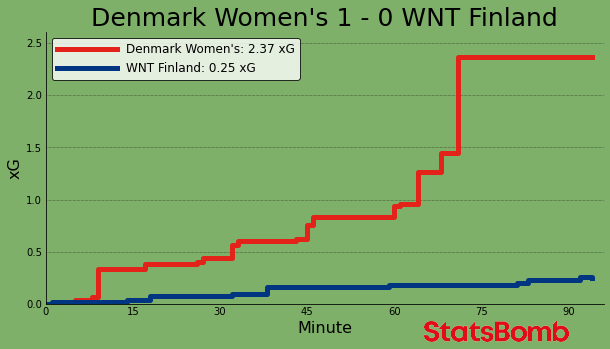

In [226]:
fig, ax = plt.subplots(figsize = (10,5))
fig.set_facecolor(pitchColor)
ax.patch.set_facecolor(pitchColor)

ax.grid(ls='dotted',lw=.5,color='black',axis='y',zorder=1)

spines = ['top','right']
for x in spines:
    if x in spines:
        ax.spines[x].set_visible(False)

plt.xlabel('Minute', color=textColor, fontsize=16)
plt.ylabel('xG', color=textColor, fontsize=16)
plt.xticks([0, 15, 30, 45, 60, 75, 90])
plt.xlim([0, last_min+2])
plt.ylim([0, xg_max*1.1])

ax.tick_params(axis="both",length=0)


ax.step(x=h_min, y=h_cumulative, linewidth=5, where='post', color= hteamColor, label= f"{hteam}: {hlast} xG")
ax.step(x=a_min, y=a_cumulative, linewidth=5, where='post', color=ateamColor, label= f"{ateam}: {alast} xG")

ax.legend(facecolor='white', handlelength=5, edgecolor='black', fontsize=12, loc='upper left')

ax.set_title(f"{hteam} {hscore} - {ascore} {ateam}", fontsize=25, color=textColor)

ax3 = fig.add_axes([0.65, -0.002, 0.20, 0.10])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig('viz/xG Flow Chart', dpi=300, bbox_inches='tight')

In [330]:
agg_xg = (allshots.groupby(['player', "team"]).agg({'shot_statsbomb_xg':'sum'}).reset_index())
agg_xg = agg_xg.sort_values(by =["shot_statsbomb_xg"], ascending =False)
agg_xg = agg_xg.head(10)
agg_xg = agg_xg.reset_index(drop=True)

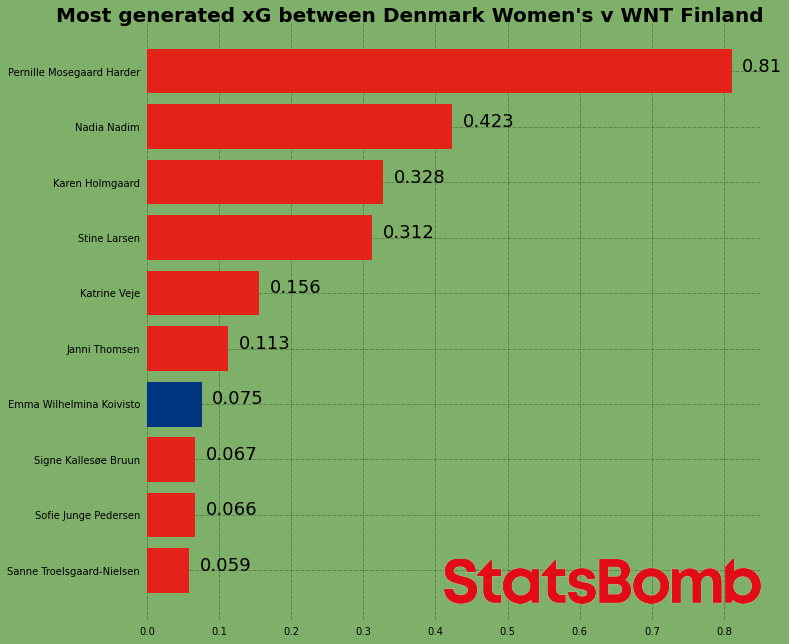

In [411]:

    ### Define labels and metrics
    player = agg_xg['player']
    value = agg_xg['shot_statsbomb_xg']

    ### Create figure 
    fig, ax = plt.subplots(figsize =(11, 11))
    fig.set_facecolor(pitchColor)
    ax.patch.set_facecolor(pitchColor)

    ax.grid(visible=True,
            color='black',
            linestyle='-.',
            linewidth=0.5,
            alpha=0.5,
        zorder=1
           )
    
    
    ### Create Horizontal Bar Plot
    bars = ax.barh(player,
                   value,
                   color=hteamColor,
                   alpha=1,
                   zorder=2
                  )

    
selected_player_1=6 
selected_player_1_colour=ateamColor
bars[selected_player_1].set_color(selected_player_1_colour)

spines = ['top', 'right', 'bottom', 'left']
    for s in spines:
        if s in ['top', 'right', 'bottom', 'left']:
            ax.spines[s].set_visible(False)
        else:
            ax.spines[s].set_color(text_colour)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.invert_yaxis()




for i in ax.patches:
        plt.text(i.get_width()+0.015, i.get_y()+0.4,
                 str(round((i.get_width()), 3)),
                 fontsize=18,
                 fontweight='regular',
                 color ='black')
        
plt.figtext(0.01,
                0.88,
                f'Most generated xG between {hteam} v {ateam}',
                fontsize=20,
                fontweight='bold', 
                color=textColor
               )    
    
ax3 = fig.add_axes([0.50, -0.002, 0.40, 0.35])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig(f'viz/top 10 xG created, {hteam} vs {ateam}', dpi=300, bbox_inches='tight')

In [227]:
shots = df[df.type == "Shot"]
shots = shots[shots.team == hteam]

shots = shots[['team', 'player', 'minute', 'second', 'location',"shot_end_location", 'shot_statsbomb_xg', 'shot_outcome', "type", "id", "shot_key_pass_id"]]

shots['x'] = shots.location.apply(lambda x: x[0])
shots['y'] = shots.location.apply(lambda x: x[1])
shots = shots.drop('location', axis=1)


shots_fin = df[df.type == "Shot"]
shots_fin = shots_fin[shots_fin.team == ateam]

shots_fin = shots_fin[['team', 'player', 'minute', 'second', 'location',"shot_end_location", 'shot_statsbomb_xg', 'shot_outcome', "type"]]

shots_fin['x'] = shots_fin.location.apply(lambda x: x[0])
shots_fin['y'] = shots_fin.location.apply(lambda x: x[1])
shots_fin = shots_fin.drop('location', axis=1)

goals_fin = shots_fin[shots_fin.shot_outcome == 'Goal']
shots_fin = shots_fin[shots_fin.shot_outcome != 'Goal']
goals = shots[shots.shot_outcome == 'Goal']
shots = shots[shots.shot_outcome != 'Goal']

goals["player"] = goals["player"].apply(lambda x: str(x).split()[-1])
goals_fin["player"] = goals_fin["player"].apply(lambda x: str(x).split()[-1])

In [228]:
ascore = (goals_fin["shot_outcome"]=='Goal').sum()
hscore = (goals["shot_outcome"]=='Goal').sum()

In [229]:
shotsDen = (shots.shape[0]+ goals.shape[0])
shotsFin = shots_fin.shape[0]

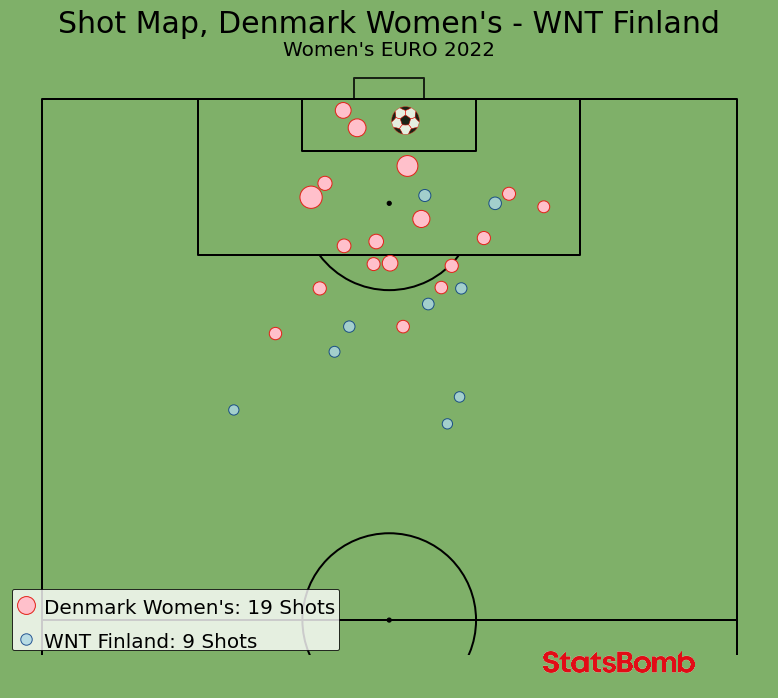

In [230]:
pitch = VerticalPitch(pitch_type='statsbomb', half=True, goal_type="box", goal_alpha=0.8,
                      pitch_color=pitchColor, line_color=linesColor)

fig,axs= pitch.grid(figheight=10, title_height=0.08, endnote_space=0, 
                    axis=False,title_space=0, grid_height=0.82, endnote_height=0.05)

fig.set_facecolor(figColor)

scatter_shots = pitch.scatter(shots.x, shots.y, s=(shots.shot_statsbomb_xg * 900) + 130, 
                              c='pink', edgecolors= hteamColor, marker='o', 
                              alpha = 1, ax=axs['pitch'], label=f"{hteam}: {shotsDen} Shots")

scatter_goals= pitch.scatter(goals.x, goals.y, s=(goals.shot_statsbomb_xg * 900) + 130, 
                             c="white", edgecolor= hteamColor, marker="football", ax=axs["pitch"], 
                             alpha = .80)

scatter_shots_fin = pitch.scatter(shots_fin.x, shots_fin.y, s=(shots_fin.shot_statsbomb_xg * 900) + 100,
                                  c='lightblue', edgecolors=ateamColor, marker='o', 
                                  alpha = .80, label=f"{ateam}: {shotsFin} Shots", ax=axs['pitch'])

HighlightText(x=0.25, y=0.5,
              s='The weather is <sunny>\nYesterday it was <cloudy>',
              highlight_textprops=[{"color": 'yellow'},
                                   {"color": 'grey'}],
              ax=ax)


axs["title"].text (0.5, 0.7, (f"Shot Map, {hteam} - {ateam}"), color=textColor, va="center", ha="center", fontsize=30)


axs["title"].text (0.5, 0.25, tournament, color=textColor, va="center", ha="center", fontsize=20)

legend = axs['pitch'].legend(loc='lower left', facecolor="white", edgecolor="black", labelspacing=1.5)
for text in legend.get_texts():
    text.set_fontsize(20)
    text.set_va('center')
    
ax3 = fig.add_axes([0.65, 0.050, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)


#plt.savefig(f'viz/Shot Map, {hteam} v {ateam}', dpi=300, bbox_inches='tight')

In [231]:
match_360_df = pd.read_json(f"C:\\Users\\Gusse\\OneDrive\\Dokumenter\\GitHub\\open-data\\data\\three-sixty\\3835329.json")

In [232]:
df_360= pd.merge(left=dfDen, right=match_360_df, left_on="id", right_on="event_uuid", how="left")

In [233]:
df_360 = df_360[(df_360["player_id"]==MVP) & (df_360["shot_outcome"]== "Goal")].reset_index(drop=True)

In [234]:
df_360['x'] = df_360.location.apply(lambda x: x[0])
df_360['y'] = df_360.location.apply(lambda x: x[1])

In [235]:
df_360['x_end'] = df_360.shot_end_location.apply(lambda x: x[0])
df_360['y_end'] = df_360.shot_end_location.apply(lambda x: x[1])

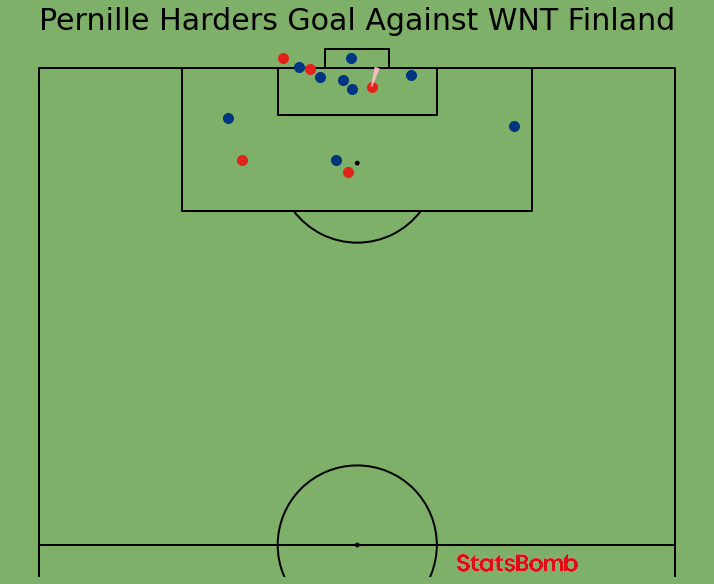

In [419]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box", half=True)
fig, ax = pitch.draw(figsize=(12, 8), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)


df_360=df_360[0:1]

P.scatter(x=df_360["y"], y=df_360["x"], ax=ax)
P.lines(xstart=df_360["y"], ystart=df_360["x"], xend=df_360["y_end"], yend=df_360["x_end"],
        ax=ax, color= "pink", comet=True)

for x in df_360.iloc[0]["freeze_frame"]:
    if x["teammate"]:
        color = hteamColor
    else:
        color = ateamColor
    
    
    P.scatter(x=x["location"][1], y=x["location"][0], ax=ax, c=color, s=100)

    
ax.set_title(f"{MVPname}s Goal Against {ateam}", fontsize=30, color=textColor)

ax3 = fig.add_axes([0.55, 0.014, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

    
#plt.savefig(f'viz/{MVPname}s Goal Against {ateam}', dpi=300, bbox_inches='tight')

In [237]:
shotsDen_reverseX = shots
shotsDen_reverseX['x'] = mplpitch.dim.right - shotsDen_reverseX.x

In [238]:
goalsDen_reverseX = goals
goalsDen_reverseX['x'] = mplpitch.dim.right - goalsDen_reverseX.x

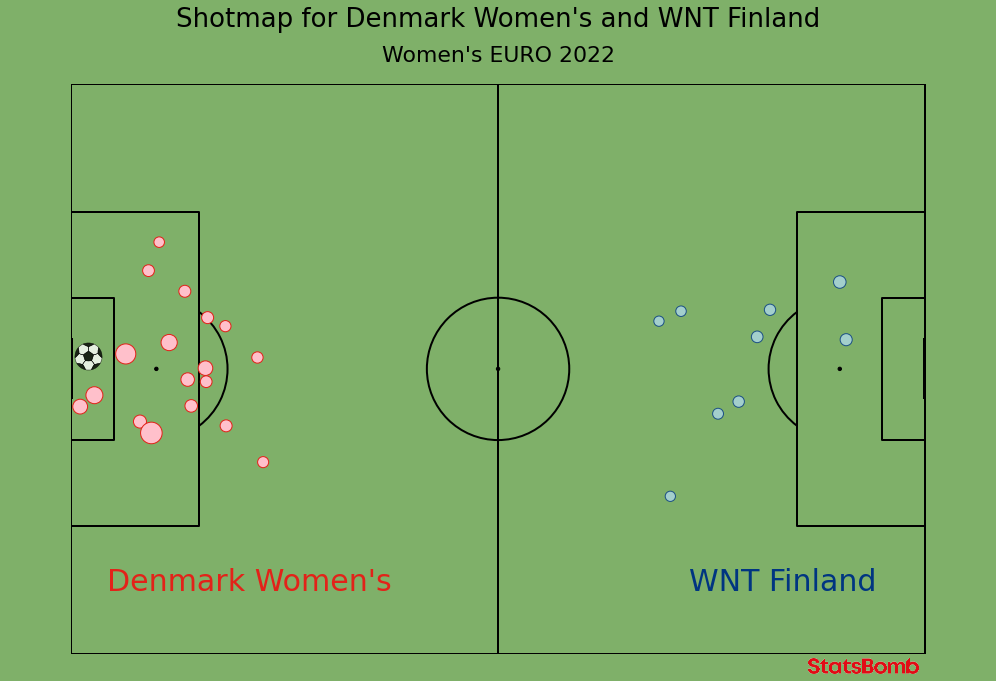

In [239]:
fig, axs = mplpitch.jointgrid(figheight=11, left=None, bottom=0.075, marginal=0.1, 
                              space=0, grid_width=0.9, title_height=0, axis=False, endnote_height=0, grid_height=0.8)
plt.gca().invert_yaxis()
fig.set_facecolor(figColor)

scatter_shots = mplpitch.scatter(shotsDen_reverseX.x, shotsDen_reverseX.y, 
                                 s=(shotsDen_reverseX.shot_statsbomb_xg * 900) + 100, c='pink', edgecolors= hteamColor,
                                 marker='o', alpha = 1, ax=axs['pitch'])

scatter_goals= mplpitch.scatter(goalsDen_reverseX.x, goalsDen_reverseX.y, 
                                s=(goalsDen_reverseX.shot_statsbomb_xg * 900) + 100, c="white", 
                                marker="football", ax=axs["pitch"], alpha = .80)

scatter_shots_fin = mplpitch.scatter(shots_fin.x, shots_fin.y, 
                                     s=(shots_fin.shot_statsbomb_xg * 900) + 100, c='lightblue', edgecolors=ateamColor, 
                                     marker='o', alpha = .80, ax=axs['pitch'])

txt1 = axs['pitch'].text(x=25, y=10, s= hteam ,color=hteamColor,
                         ha='center', va='center', fontsize=30)
txt2 = axs['pitch'].text(x=100, y=10, s= ateam, color=ateamColor,
                         ha='center', va='center', fontsize=30)

txt3 = axs['pitch'].text(60, 89, (f"Shotmap for {hteam} and {ateam}"), color=textColor,
                  fontsize=26, ha='center', va='center')

text4 = axs['pitch'].text(60, 84, tournament, color= textColor, fontsize=22, ha='center', va='center')

ax3 = fig.add_axes([0.7, 0.050, 0.27, 0.02])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig(f'viz/Shotmap, {hteam} v {ateam}, full pitch', dpi=300, bbox_inches='tight')

In [240]:
pass_den = df[df.type == "Pass"]
pass_den = pass_den[pass_den.team == hteam]
pass_den = pass_den[(pass_den["pass_type"]!="Kick Off") & (pass_den["pass_type"]!="Goal Kick") 
                    & (pass_den["pass_type"]!="Free Kick") & (pass_den["pass_type"]!="Throw-in") 
                    & (pass_den["pass_type"]!="Corner") & (pass_den["pass_outcome"]!="Incomplete") 
                    & (pass_den["pass_outcome"]!="Pass Offisde") & (pass_den["pass_outcome"]!="Out") 
                    & (pass_den["pass_outcome"]!="Unknown")]

pass_den = pass_den[['team', 'player', "player_id", 'minute', 'second', 'location', "pass_type", "pass_outcome",
                     "pass_end_location", "type", "pass_assisted_shot_id"]]

pass_den['x_start'] = pass_den.location.apply(lambda x: x[0])
pass_den['y_start'] = pass_den.location.apply(lambda x: x[1])

pass_den['x_end'] = pass_den.pass_end_location.apply(lambda x: x[0])
pass_den['y_end'] = pass_den.pass_end_location.apply(lambda x: x[1])
pass_den = pass_den.drop('location', axis=1)
pass_den = pass_den.drop('pass_end_location', axis=1)
pass_den = pass_den.reset_index()
countPassDen = pass_den.shape[0]

In [241]:
pass_den['beginning'] = np.sqrt(np.square(120-pass_den['x_start']) + np.square(40 -pass_den['y_start']))
pass_den['end'] = np.sqrt(np.square(120 - pass_den['x_end']) + np.square(40 - pass_den['y_end']))

pass_den['progressive'] = [(pass_den['end'][x]) / (pass_den['beginning'][x]) < .75 for x in range(len(pass_den.beginning))]

In [242]:
progPasses_den = pass_den[pass_den["progressive"]==True]

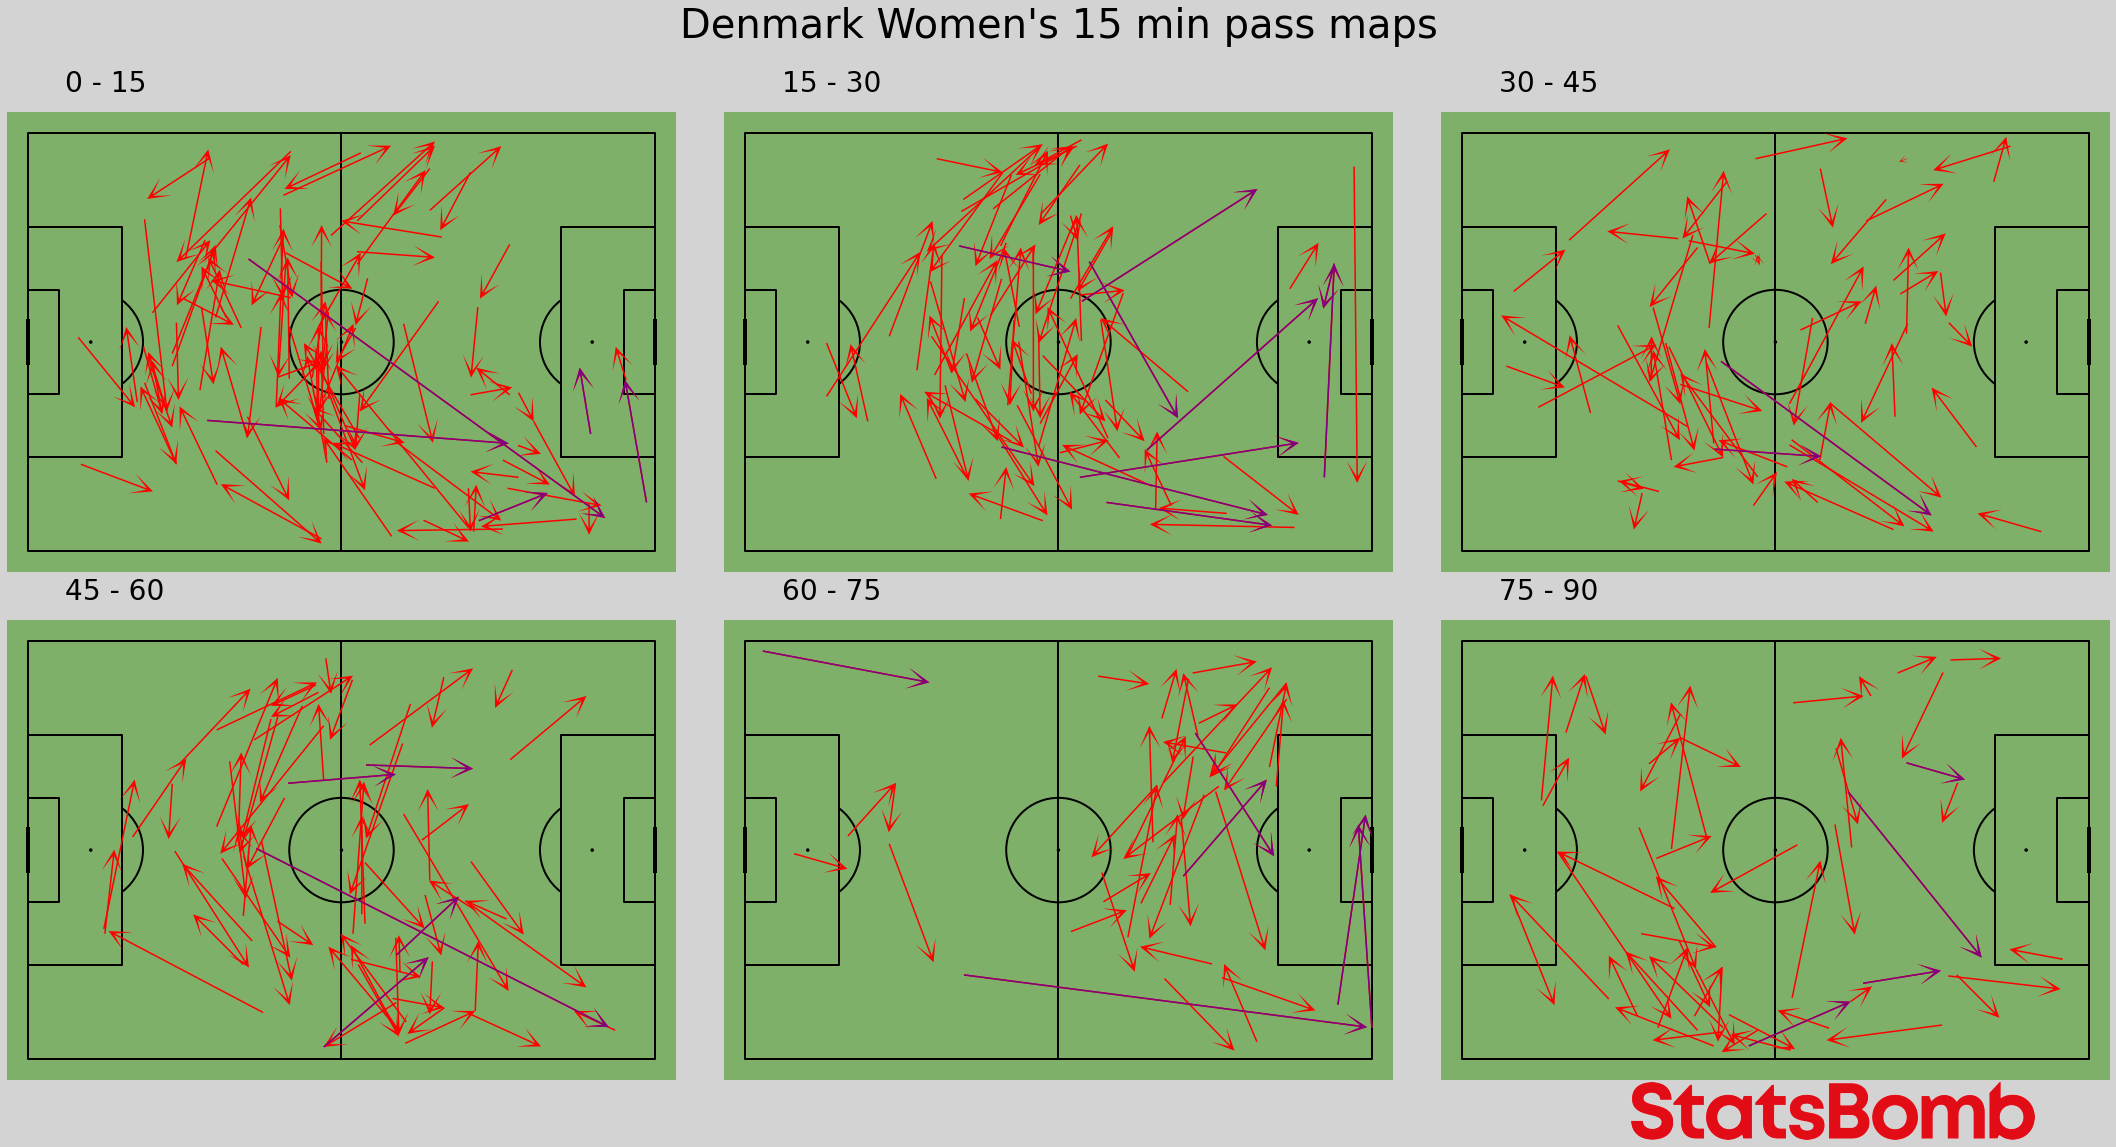

In [243]:
pitch = Pitch(pitch_type="statsbomb", pitch_color=pitchColor, line_color=linesColor)
fig, axs = pitch.grid(ncols=3, nrows=2, endnote_height=0.03, endnote_space=0, axis=False, title_height=0.08, grid_height=0.84, figheight=16)
fig.set_facecolor("lightgrey")

for i, ax in enumerate(axs["pitch"].flat):
    tempPasses = pass_den[(pass_den["minute"]>i*15) & (pass_den["minute"]<i*15+15)]
    tempProg = progPasses_den[(progPasses_den["minute"]>i*15) & (progPasses_den["minute"]<i*15+15)]
    
    
    pitch.arrows(tempPasses["x_start"], tempPasses["y_start"],tempPasses["x_end"], tempPasses["y_end"],
                 ax=ax, width=1.5, headwidth=14, headlength=15, color="red", alpha=1)
    pitch.arrows(tempProg["x_start"], tempProg["y_start"],tempProg["x_end"], tempProg["y_end"], 
                 ax=ax, width=1.5, headwidth=14, headlength=15, color="purple", alpha=1)
    
    ax.text(7, -8, f"{i*15} - {i*15+15}", fontsize=28)
    
axs['title'].text(0.5,0.8,f"{hteam} 15 min pass maps", fontsize=40, ha='center', va='center')

ax3 = fig.add_axes([0.75, -0.002, 0.20, 0.05])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig(f'viz/Passmap: per min, {hteam} v {ateam}', dpi=300, bbox_inches='tight')

In [244]:
passHarder = df[df["player_id"]== MVP]
passHarder = passHarder[(passHarder["type"]== "Pass") & (passHarder["pass_outcome"]!="Incomplete") 
                        & (passHarder["pass_outcome"]!="Out")]
passHarder = passHarder[['team', 'player', "player_id", 'minute', 'second', 'location', "pass_type", "pass_outcome",
                         "pass_end_location", "type"]]

passHarder['x_start'] = passHarder.location.apply(lambda x: x[0])
passHarder['y_start'] = passHarder.location.apply(lambda x: x[1])

passHarder['x_end'] = passHarder.pass_end_location.apply(lambda x: x[0])
passHarder['y_end'] = passHarder.pass_end_location.apply(lambda x: x[1])
passHarder = passHarder.drop('location', axis=1)
passHarder = passHarder.drop('pass_end_location', axis=1)

countPassHarder = passHarder.shape[0]

In [245]:
passHarder_failed = df[df["player_id"]== MVP]
passHarder_failed = passHarder_failed[passHarder_failed["type"]== "Pass"]
passHarder_failed = passHarder_failed[['team', 'player', "player_id", 'minute', 'second', 'location', "pass_type", 
                                       "pass_outcome",
                         "pass_end_location", "type"]]

passHarder_failed = passHarder_failed[passHarder_failed['pass_outcome'].notna()]

passHarder_failed['x_start'] = passHarder_failed.location.apply(lambda x: x[0])
passHarder_failed['y_start'] = passHarder_failed.location.apply(lambda x: x[1])
passHarder_failed['x_end'] = passHarder_failed.pass_end_location.apply(lambda x: x[0])
passHarder_failed['y_end'] = passHarder_failed.pass_end_location.apply(lambda x: x[1])

countFailedHarder = passHarder_failed.shape[0]

In [246]:
harderProg = progPasses_den[progPasses_den["player_id"]==MVP]

countProgHarder = harderProg.shape[0]

Text(0.5, 1.0, "Pass Map Denmark Women's")

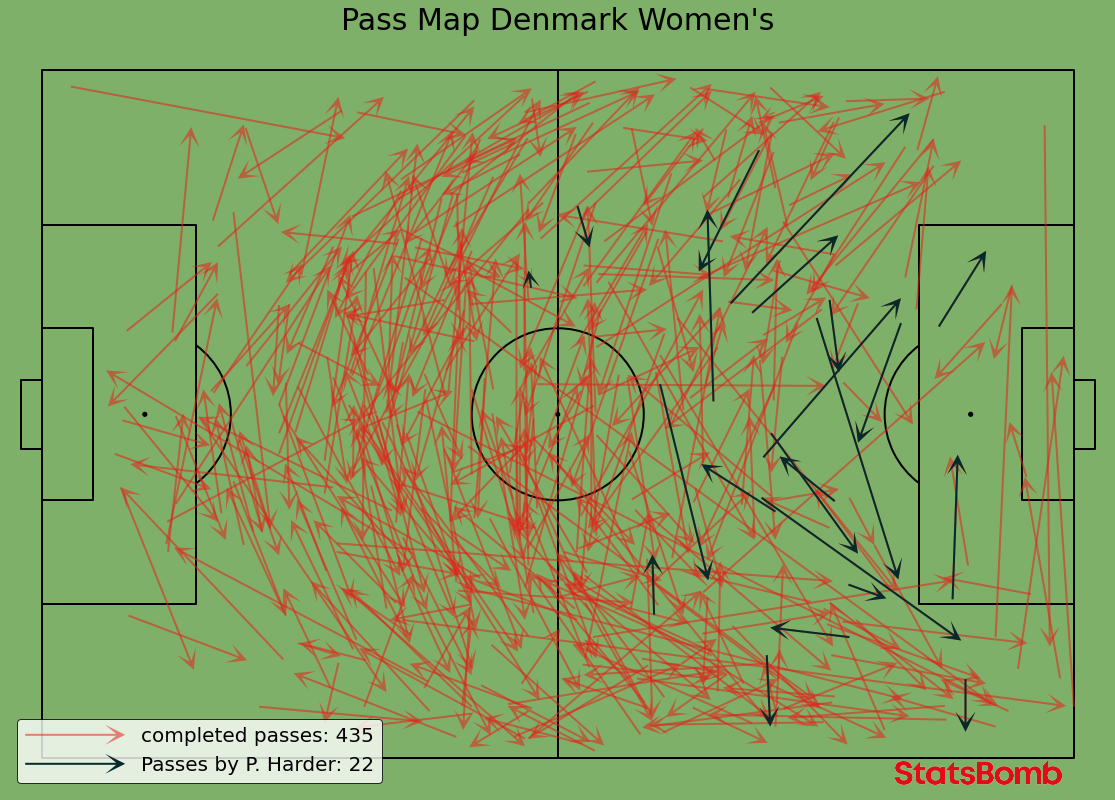

In [247]:
pitch = Pitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box",)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)


pitch.arrows(pass_den.x_start, pass_den.y_start,
             pass_den.x_end, pass_den.y_end, width=2,
             headwidth=10, headlength=10, color= hteamColor, ax=ax, label=f'completed passes: {countPassDen}', alpha = .55)

pitch.arrows(passHarder.x_start, passHarder.y_start,
             passHarder.x_end, passHarder.y_end, width=2,
             headwidth=10, headlength=10, color='#042A2B', ax=ax, label=f'Passes by P. Harder: {countPassHarder}', alpha = 1)


ax.legend(facecolor='white', handlelength=5, edgecolor='black', fontsize=20, loc='lower left')

ax3 = fig.add_axes([0.73, 0.014, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

ax.set_title(f"Pass Map {hteam}", fontsize=30, color=textColor)

#plt.savefig(f'viz/Pass Map {hteam}', dpi=300, bbox_inches='tight')

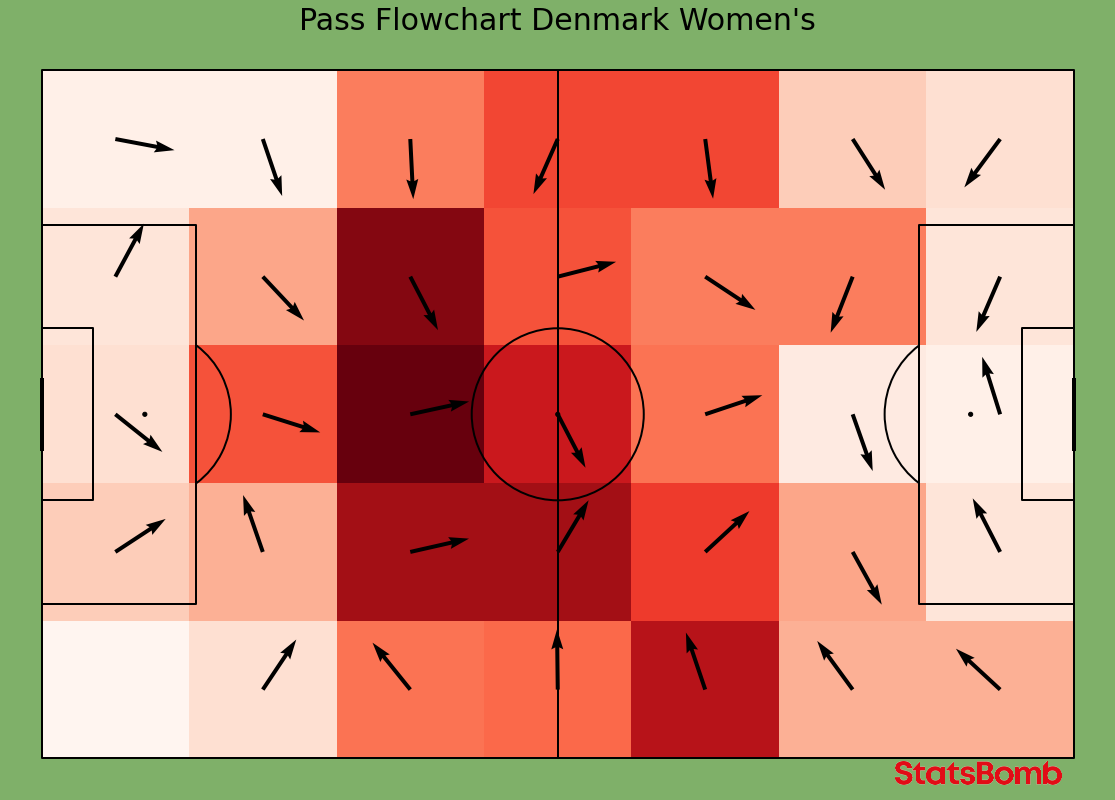

In [248]:
pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color=linesColor, pitch_color=pitchColor)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(pitchColor)

bins = (7, 5)

bs_heatmap = pitch.bin_statistic(pass_den.x_start, pass_den.y_start, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Reds')

fm = pitch.flow(pass_den.x_start, pass_den.y_start, pass_den.x_end, pass_den.y_end,
                color='black', arrow_type='same',
                arrow_length=7, bins=bins, ax=ax)

ax.set_title(f"Pass Flowchart {hteam}", fontsize=30, color=textColor)

ax3 = fig.add_axes([0.73, 0.014, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig(f'viz/Pass Flowchart {hteam}', dpi=300, bbox_inches='tight')

In [249]:
pass_fin = df[df.type == "Pass"]
pass_fin = pass_fin[pass_fin.team == ateam]
pass_fin = pass_fin[(pass_fin["pass_type"]!="Kick Off") & (pass_fin["pass_type"]!="Goal Kick") 
                    & (pass_fin["pass_type"]!="Free Kick") & (pass_fin["pass_type"]!="Throw-in") 
                    & (pass_fin["pass_type"]!="Corner") & (pass_fin["pass_outcome"]!="Incomplete") 
                    & (pass_fin["pass_outcome"]!="Pass Offisde") & (pass_fin["pass_outcome"]!="Out") 
                    & (pass_fin["pass_outcome"]!="Unknown")]

pass_fin = pass_fin[['team', 'player', "player_id", 'minute', 'second', 'location', "pass_type", "pass_outcome",
                     "pass_end_location", "type", "pass_assisted_shot_id"]]

pass_fin['x_start'] = pass_fin.location.apply(lambda x: x[0])
pass_fin['y_start'] = pass_fin.location.apply(lambda x: x[1])

pass_fin['x_end'] = pass_fin.pass_end_location.apply(lambda x: x[0])
pass_fin['y_end'] = pass_fin.pass_end_location.apply(lambda x: x[1])
pass_fin = pass_fin.drop('location', axis=1)
pass_fin = pass_fin.drop('pass_end_location', axis=1)

countPass_fin = pass_fin.shape[0]

Text(0.5, 1.0, 'Pass Map for WNT Finland')

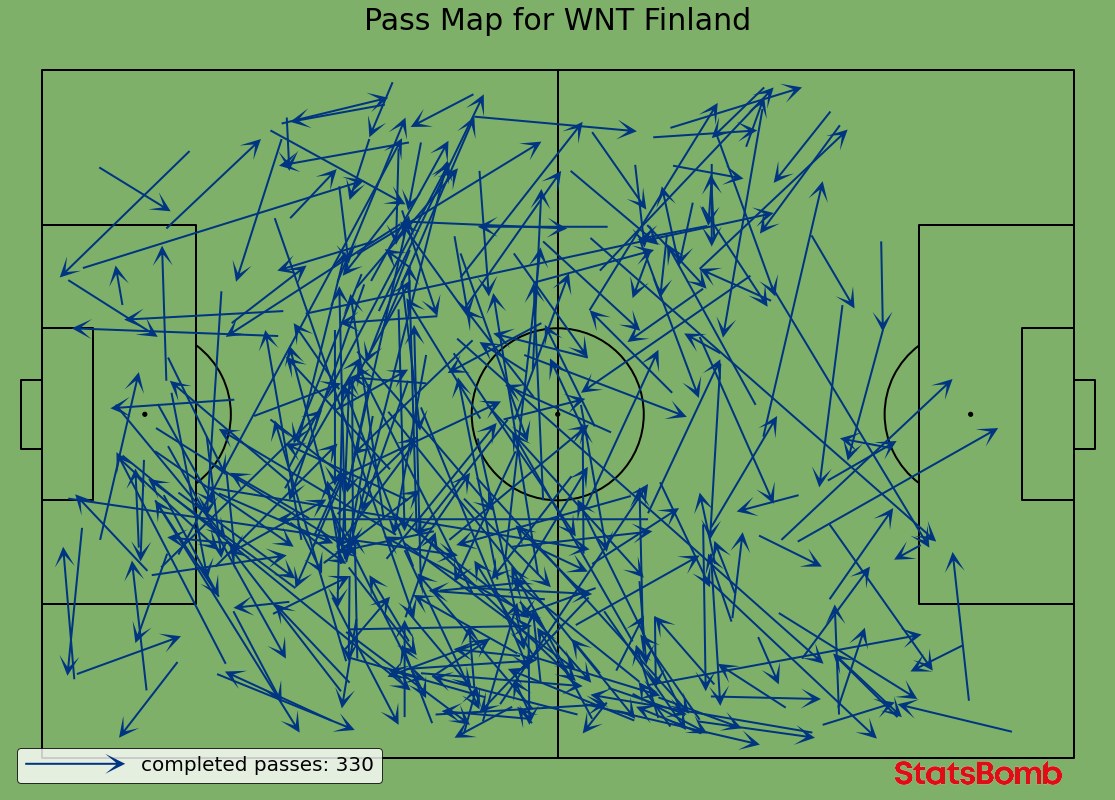

In [250]:
pitch = Pitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor, goal_type="box",)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)


pitch.arrows(pass_fin.x_start, pass_fin.y_start,
             pass_fin.x_end, pass_fin.y_end, width=2,
             headwidth=10, headlength=10, color=ateamColor, ax=ax, label=f'completed passes: {countPass_fin}', alpha = 1)


ax.legend(facecolor='white', handlelength=5, edgecolor='black', fontsize=20, loc='lower left')

ax3 = fig.add_axes([0.73, 0.014, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

ax.set_title(f"Pass Map for {ateam}", fontsize=30, color=textColor)

#plt.savefig(f'viz/Pass Map {ateam}', dpi=300, bbox_inches='tight')

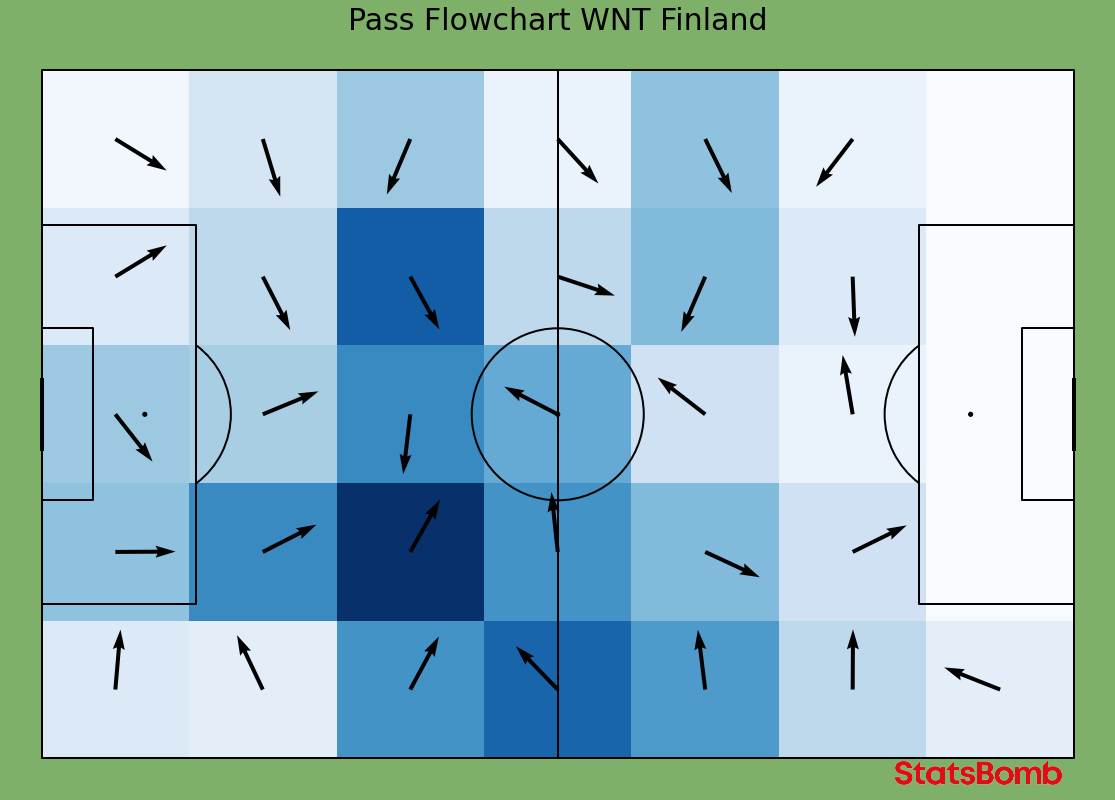

In [251]:
pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color=linesColor, pitch_color=pitchColor)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(pitchColor)

bs_heatmap = pitch.bin_statistic(pass_fin.x_start, pass_fin.y_start, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')

fm = pitch.flow(pass_fin.x_start, pass_fin.y_start, pass_fin.x_end, pass_fin.y_end,
                color='black', arrow_type='same',
                arrow_length=7, bins=bins, ax=ax)

ax.set_title(f"Pass Flowchart {ateam}", fontsize=30, color=textColor)

ax3 = fig.add_axes([0.73, 0.014, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

#plt.savefig(f'viz/Pass Flowchart {ateam}', dpi=300, bbox_inches='tight')

In [252]:
pass_den_map = pass_den.copy()

pass_den_map["passer"] = pass_den_map["player_id"]
pass_den_map["recipient"] = pass_den_map["player_id"].shift(-1)

subs = dfDen[dfDen["type"] =="Substitution"]
subs = subs["minute"]
firstSub = subs.min()

pass_den_map = pass_den_map[pass_den_map["minute"]<firstSub]

In [253]:
players = dfDen["player"].unique()

In [254]:
starters = players[1:12]

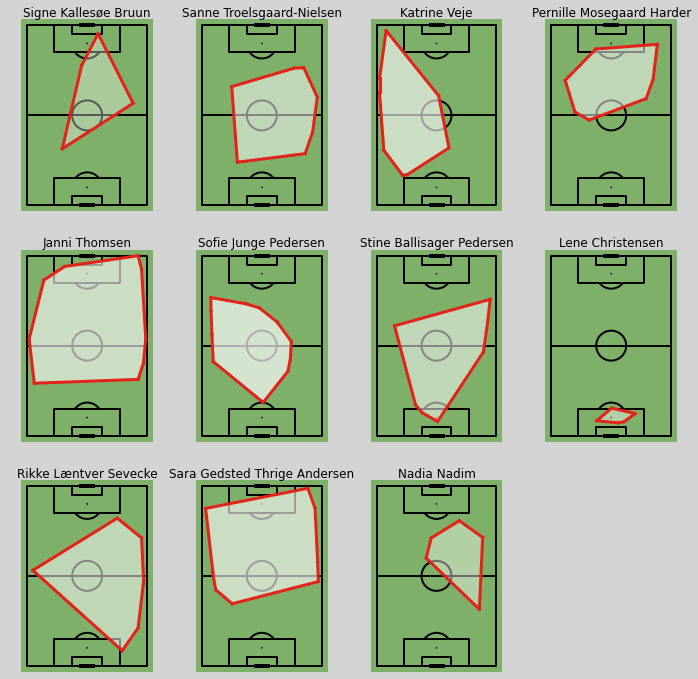

In [175]:
fig, axes = plt.subplots(3,4,figsize=(12,12))
fig.set_facecolor('lightgrey')
axes.flat[-1].set_visible(False)


pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor)



for i,ax in enumerate(fig.axes):
    try:
        ax.set_facecolor("red")
        pitch.draw(ax=ax)

        con = pass_den[(pass_den.player == starters[i])]
        con = con[(np.abs(stats.zscore(con[['x_start','y_start']])) < 4.5)]

        points = con[['y_start','x_start']].values
        hull = ConvexHull(con[['x_start','y_start']])

        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], hteamColor,lw=3)
            ax.fill(points[hull.vertices,0], points[hull.vertices,1], c='white', alpha=0.1)
            ax.set_ylabel(ylabel=' ')


        ax.set_title(label=starters[i],c='black',va='center',ha='center',fontsize=12)
    except:
        pass
    
s = f'Barcelona  vs Real Betis'
fig_text(s=s,  x=.175,y=.9)

In [257]:
starting_player_numbers = ["9", "11", "10", "7", "13", "4", "20", "2", "3", "19", "1"]

average_locations = pass_den_map.groupby("passer").agg({"x_start":["mean"], "y_start": ["mean", "count"]})
average_locations.columns = ["x_start","y_start", "count", ]
average_locations["jersey_number"] = starting_player_numbers
average_locations.sort_values(by="passer", ascending=True)

harder_location = average_locations[average_locations["jersey_number"]== "10"]

pass_between = pass_den_map.groupby(["passer", "recipient"]).player_id.count().reset_index()
pass_between.rename({"player_id": "pass_count"},axis="columns", inplace=True)

pass_between = pass_between.merge(average_locations, left_on="passer", right_index = True)
pass_between = pass_between.merge(average_locations, left_on="recipient", right_index = True, suffixes=["","_end"])

MAX_LINE_WIDTH = 14
MAX_MARKER_SIZE = 3000
pass_between['width'] = (pass_between.pass_count / pass_between.pass_count.max() *
                           MAX_LINE_WIDTH)
average_locations['marker_size'] = (average_locations['count']
                                         / average_locations['count'].max() * MAX_MARKER_SIZE)
harder_location['marker_size'] = (average_locations['count']
                                         / average_locations['count'].max() * MAX_MARKER_SIZE)

MIN_TRANSPARENCY = 0.7
color = np.array(to_rgba('white'))
color = np.tile(color, (len(pass_between), 1))
c_transparency = pass_between.pass_count / pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

C:\Users\Gusse\AppData\Local\Temp\ipykernel_16136\660942509.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  harder_location['marker_size'] = (average_locations['count']


In [260]:
average_locations

,x_start,y_start,count,jersey_number,marker_size
passer,,,,,
4650.0,79.133333,56.844444,9,9,402.985075
10088.0,54.992593,20.614815,54,11,2417.910448
10108.0,85.617647,44.364706,17,10,761.194030
10109.0,63.502703,53.397297,37,7,1656.716418
10275.0,61.130769,32.600000,26,13,1164.179104
15789.0,51.111321,58.447170,53,4,2373.134328
24460.0,79.342857,48.642857,7,20,313.432836
32223.0,78.426087,41.047826,23,2,1029.850746
87185.0,45.552239,41.759701,67,3,3000.000000


Text(0.5, 1.0, "Pass Network Denmark Women's")

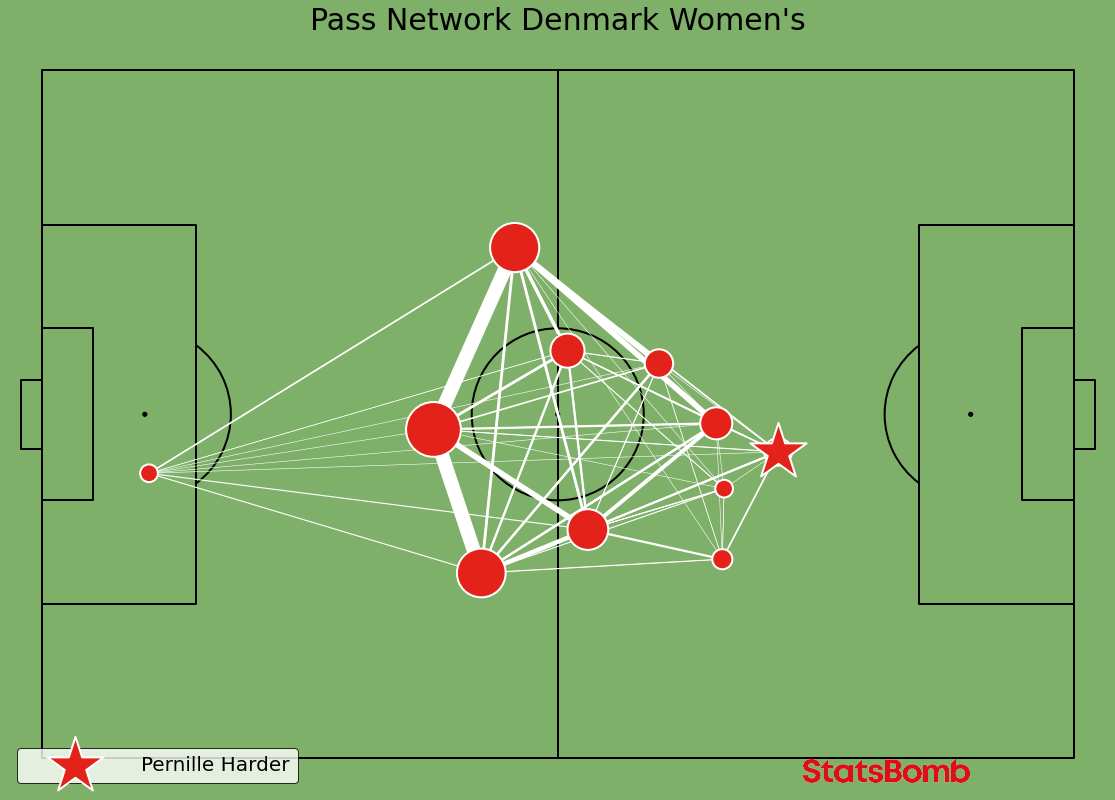

In [268]:
pitch = Pitch(pitch_type='statsbomb', goal_type="box", pitch_color=pitchColor, line_color=linesColor)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)


pass_lines = pitch.lines(pass_between.x_start, pass_between.y_start,
                         pass_between.x_start_end, pass_between.y_start_end, lw=pass_between.width,
                         color="white", zorder=1, ax=ax)


pass_nodes = pitch.scatter(average_locations.x_start, average_locations.y_start,
                           s=average_locations.marker_size,
                           color=hteamColor, edgecolors='#FFFFFF', linewidth=2, alpha=1, ax=ax)


harder = pitch.scatter(harder_location.x_start, harder_location.y_start,
                           s=3500,
                           marker= "*", color=hteamColor, edgecolors='#FFFFFF', linewidth=2, alpha=1,
                       ax=ax, label = "Pernille Harder")

ax.legend(facecolor='white', handlelength=5, edgecolor='black', fontsize=20, loc='lower left')

ax3 = fig.add_axes([0.65, 0.016, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

ax.set_title(f"Pass Network {hteam}", fontsize=30, color=textColor)

#plt.savefig(f'viz/Pass Network, {hteam}', dpi=300, bbox_inches='tight')

In [269]:
pass_fin_map = pass_fin

pass_fin_map["passer"] = pass_fin_map["player_id"]
pass_fin_map["recipient"] = pass_fin_map["player_id"].shift(-1)

subsFin = dfFin[dfFin["type"] =="Substitution"]
subsFin = subsFin["minute"]
firstSubFin = subsFin.min()

pass_fin_map = pass_fin_map[pass_fin_map["minute"]<firstSubFin]

In [270]:
average_locationsFin = pass_fin_map.groupby("passer").agg({"x_start":["mean"], "y_start": ["mean", "count"]})
average_locationsFin.columns = ["x_start","y_start", "count", ]
average_locationsFin.sort_values(by="passer", ascending=True)


pass_betweenFin = pass_fin_map.groupby(["passer", "recipient"]).player_id.count().reset_index()
pass_betweenFin.rename({"player_id": "pass_count"},axis="columns", inplace=True)

pass_betweenFin = pass_betweenFin.merge(average_locationsFin, left_on="passer", right_index = True)
pass_betweenFin = pass_betweenFin.merge(average_locationsFin, left_on="recipient", right_index = True, suffixes=["","_end"])


MAX_LINE_WIDTH_FIN = 14
MAX_MARKER_SIZE_FIN = 2500
pass_betweenFin['width'] = (pass_betweenFin.pass_count / pass_betweenFin.pass_count.max() *
                           MAX_LINE_WIDTH_FIN)
average_locationsFin['marker_size'] = (average_locationsFin['count']
                                         / average_locationsFin['count'].max() * MAX_MARKER_SIZE_FIN)

Text(0.5, 1.0, 'Pass Network For WNT Finland')

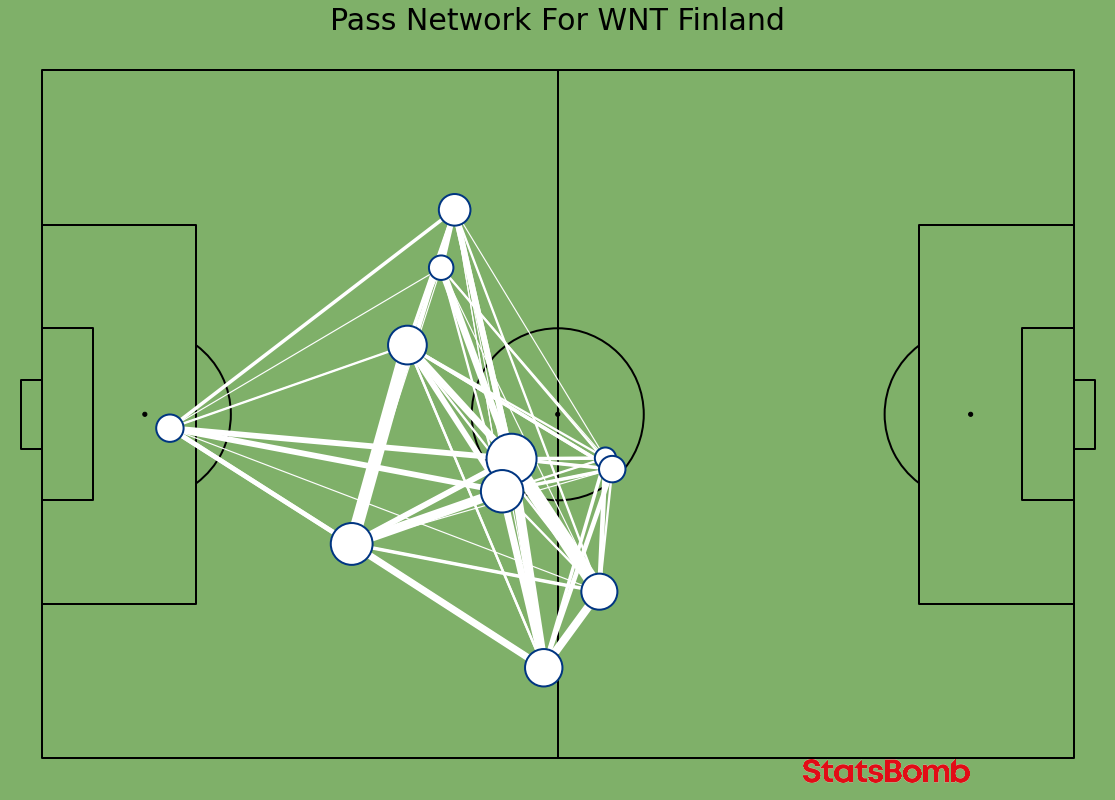

In [271]:
pitch = Pitch(pitch_type='statsbomb', goal_type="box", pitch_color=pitchColor, line_color=linesColor)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor(figColor)


pass_lines = pitch.lines(pass_betweenFin.x_start, pass_betweenFin.y_start,
                         pass_betweenFin.x_start_end, pass_betweenFin.y_start_end, lw=pass_betweenFin.width,
                         zorder=1, ax=ax, color= "white")


pass_nodes = pitch.scatter(average_locationsFin.x_start, average_locationsFin.y_start,
                           s=average_locationsFin.marker_size,
                           color= "white", edgecolors=ateamColor, linewidth=2, alpha=1, ax=ax, label = "Finland Player")
ax3 = fig.add_axes([0.65, 0.016, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)


ax.set_title(f"Pass Network For {ateam}", fontsize=30, color=textColor)

#plt.savefig(f'viz/Pass Network, {ateam}', dpi=300, bbox_inches='tight')

In [285]:
harderEvents = df[df["player_id"]== MVP]
harderEvents = harderEvents[(harderEvents["type"]!= 'Ball Receipt*') & (harderEvents["type"]!= 'Injury Stoppage') 
                            & (harderEvents["type"]!= 'Player Off') & (harderEvents["type"]!= 'Player On') 
                            & (harderEvents["type"]!= 'Substitution') & (harderEvents["type"]!= 'Miscontrol')]

harderEvents = harderEvents[[ 'player',"player_id", 'minute', 'second', 'location',  "type", 
                             "under_pressure", "dribble_outcome", "duel_type"]]

harderEvents['x'] = harderEvents.location.apply(lambda x: x[0])
harderEvents['y'] = harderEvents.location.apply(lambda x: x[1])
harderEvents = harderEvents.drop('location', axis=1)

BallRecovery = harderEvents[harderEvents.type == 'Ball Recovery']
Interception = harderEvents[harderEvents.type == 'Interception']
Dribble = harderEvents[harderEvents.type == 'Dribble']
Tackle = harderEvents[harderEvents.duel_type == "Tackle"]

countBallRecovery = BallRecovery.shape[0]
countInterception = Interception.shape[0]
countDribble = Dribble.shape[0]
countTackle = Tackle.shape[0]

xgDen = dfDen["shot_statsbomb_xg"].sum()

In [273]:
harderURL = "https://images.fotmob.com/image_resources/playerimages/200707.png"
response = requests.get(harderURL)
harderPic = Image.open(BytesIO(response.content))

In [274]:
dbuURL = "https://brandslogos.com/wp-content/uploads/images/large/dbu-logo.png"
response = requests.get(dbuURL)
DBU = Image.open(BytesIO(response.content))

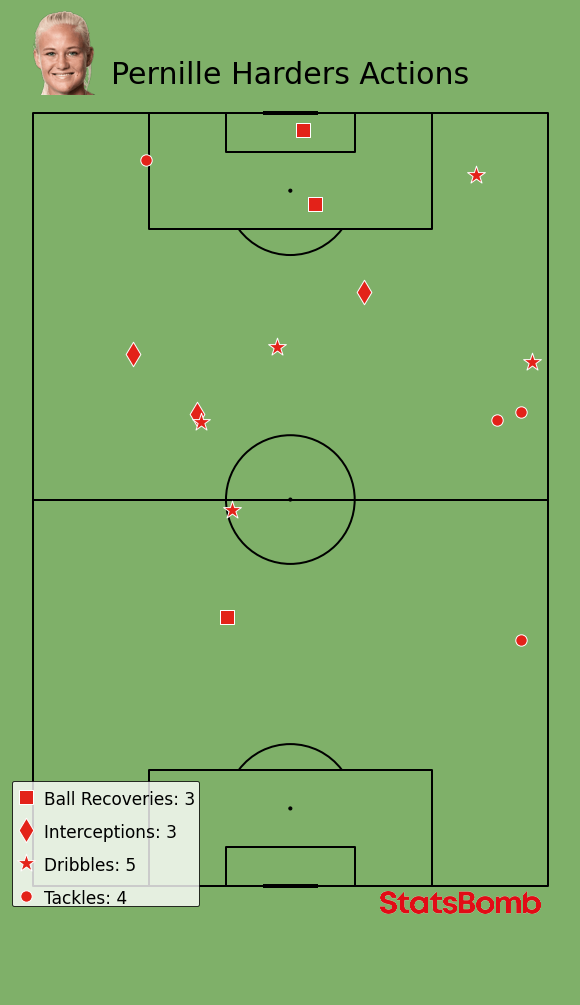

In [275]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor, line_color=linesColor)
fig, axs= pitch.grid(figheight=16, title_height=0.06, axis=False)
fig.set_facecolor(figColor)

scatter_recovery = pitch.scatter(BallRecovery.x, BallRecovery.y, c= hteamColor, edgecolor = "white",
                                 s=200, marker='s',  ax=axs['pitch'], 
                                 label = f"Ball Recoveries: {countBallRecovery}")

scatter_interception = pitch.scatter(Interception.x, Interception.y, c= hteamColor,
                                     s=300, marker='d', edgecolor = "white", ax=axs['pitch'], 
                                     label = f"Interceptions: {countInterception}")

scatter_dribble = pitch.scatter(Dribble.x, Dribble.y, c= hteamColor, edgecolor= "white",
                                s=350, marker='*',  ax=axs['pitch'], 
                                label = f"Dribbles: {countDribble}")

scatter_tackle = pitch.scatter(Tackle.x, Tackle.y, c=hteamColor, edgecolor= "white",
                               s=520, marker=".",  ax=axs['pitch'], 
                               label = f"Tackles: {countTackle}")

axs["title"].text (0.5, 0.01, f"{MVPname}s Actions", color= textColor, va="center", ha="center", fontsize=30)


ax3 = fig.add_axes([0.65, 0.033, 0.27, 0.24])
ax3.axis('off')
ax3.imshow(im)

ax4 = fig.add_axes([0.05, 0.77, 0.14, 0.24])
ax4.axis('off')
ax4.imshow(harderPic)

legend = axs['pitch'].legend(loc='lower left', labelspacing=1.5, edgecolor="black")
for text in legend.get_texts():
    text.set_fontsize(17)
    text.set_va('center')


#plt.savefig(f'viz/{MVPname} Actions, Denmark v Finland', dpi=300, bbox_inches='tight')

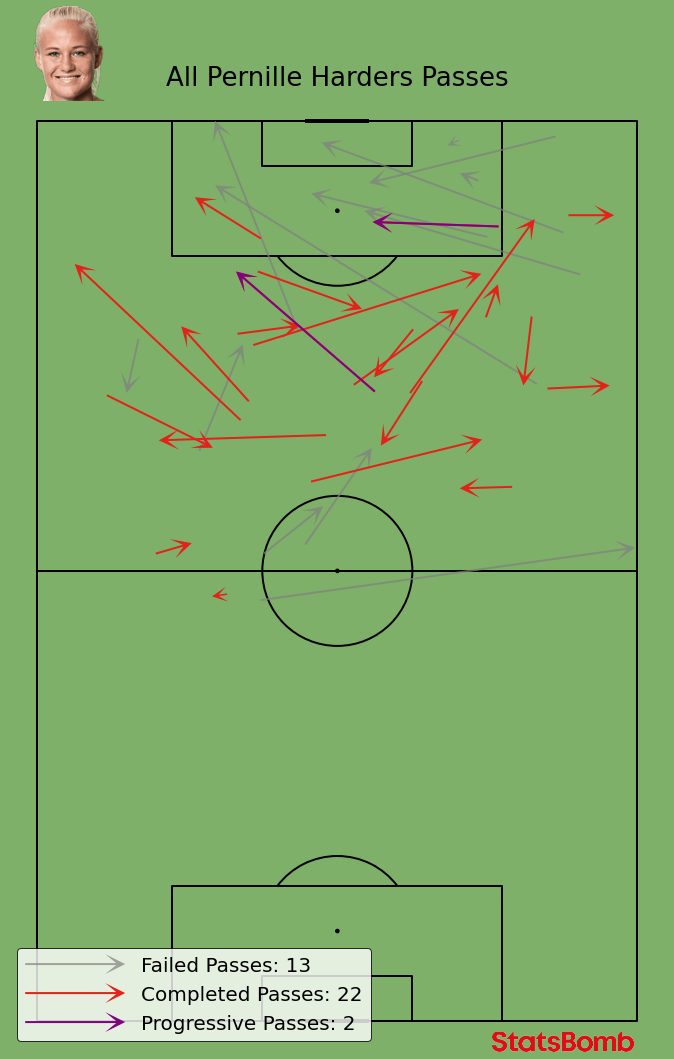

In [276]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor,  line_color=linesColor, line_zorder=1)
fig, ax = pitch.draw(figsize=(11, 14))
fig.set_facecolor(pitchColor)

pitch.arrows(passHarder_failed.x_start, passHarder_failed.y_start,
             passHarder_failed.x_end, passHarder_failed.y_end, width=2,
             headwidth=10, headlength=10, color="grey", ax=ax, 
             label=f'Failed Passes: {countFailedHarder}', alpha = .70)


pitch.arrows(passHarder.x_start, passHarder.y_start,
             passHarder.x_end, passHarder.y_end, width=2,
             headwidth=10, headlength=10, color=hteamColor, ax=ax, 
             label=f'Completed Passes: {countPassHarder}', alpha = 1)

pitch.arrows(harderProg.x_start, harderProg.y_start,
             harderProg.x_end, harderProg.y_end, width=2,
             headwidth=10, headlength=10, color="purple", ax=ax, 
             label=f'Progressive Passes: {countProgHarder}', alpha = 1)



ax.set_title(f"All {MVPname}s Passes", fontsize=26, color= textColor)


logo = fig.add_axes([0.65, 0.010, 0.27, 0.02])
logo.axis('off')
logo.imshow(im)

pic = fig.add_axes([0.10, 0.88, 0.12, 0.24])
pic.axis('off')
pic.imshow(harderPic)


ax.legend(facecolor='white', handlelength=5, edgecolor='black', fontsize=20, loc='lower left')

#plt.savefig(f'viz/{MVPname} Passmap', dpi=300, bbox_inches='tight')

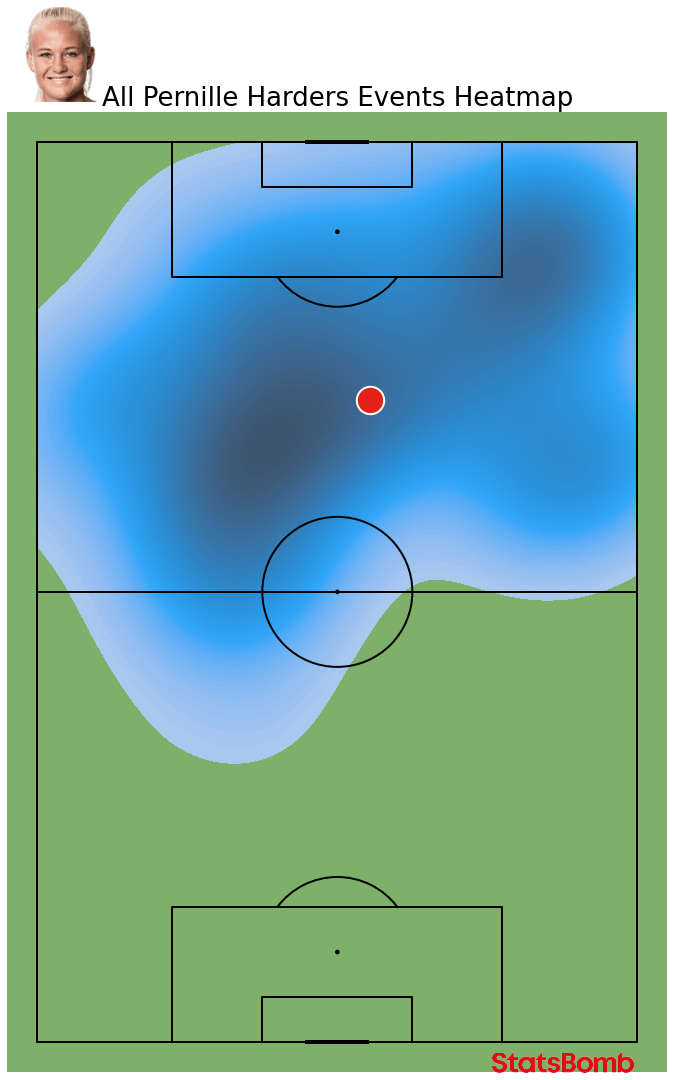

In [277]:
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color=pitchColor,  line_color=linesColor, line_zorder=2)
fig, ax = pitch.draw(figsize=(11, 14))
fig.set_facecolor("white")

kde = pitch.kdeplot(harderEvents.x, harderEvents.y, ax=ax,
                    shade=True, levels=100,
                    shade_lowest=False,
                    cut=4.1,
                    cmaps="Green")

ax.set_title(f"All {MVPname}s Events Heatmap", fontsize=26, color= textColor)

harder = pitch.scatter(harder_location.x_start, harder_location.y_start,
                           s=750,
                           marker= "o", color=hteamColor, edgecolors='#FFFFFF', linewidth=2, alpha=1,
                       ax=ax, label = "Pernille Harder")

logo = fig.add_axes([0.65, 0.010, 0.27, 0.02])
logo.axis('off')
logo.imshow(im)

pic = fig.add_axes([0.09, 0.90, 0.12, 0.24])
pic.axis('off')
pic.imshow(harderPic)

#plt.savefig(f'viz/{MVPname} Heatmap, All Events', dpi=300, bbox_inches='tight')

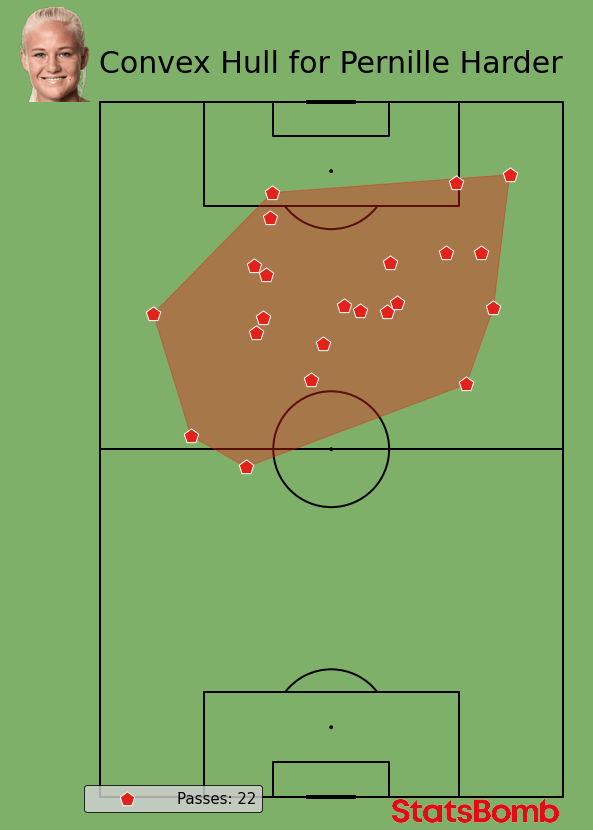

In [278]:
pitch = VerticalPitch(pitch_type='statsbomb',  line_zorder=1, line_color=linesColor, pitch_color=pitchColor)
fig, ax = pitch.draw(figsize=(16, 11))
fig.set_facecolor(pitchColor)
hull = pitch.convexhull(passHarder.x_start, passHarder.y_start)
poly = pitch.polygon(hull, ax=ax, edgecolor=hteamColor, facecolor=hteamColor, alpha=0.4, zorder=1)
scatter = pitch.scatter(passHarder.x_start, passHarder.y_start, ax=ax, marker="p", edgecolor='white', facecolor=hteamColor,
                        s=230, zorder=3, label=f"Passes: {countPassHarder}")


ax.set_title(f"Convex Hull for {MVPname}", fontsize=30, color=textColor)

ax3 = fig.add_axes([0.49, 0.010, 0.27, 0.03])
ax3.axis('off')
ax3.imshow(im)

pic = fig.add_axes([0.20, 0.92, 0.12, 0.12])
pic.axis('off')
pic.imshow(harderPic)

ax.legend(facecolor='lightgrey', handlelength=5, edgecolor='black', fontsize=15, loc='lower left',fancybox=True)

#plt.savefig(f'viz/Pass Convex Hull for {MVPname}', dpi=300, bbox_inches='tight')

In [283]:
URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf'
URL2 = 'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf'
robotto_regular = FontManager(URL)
robboto_bold = FontManager(URL2)

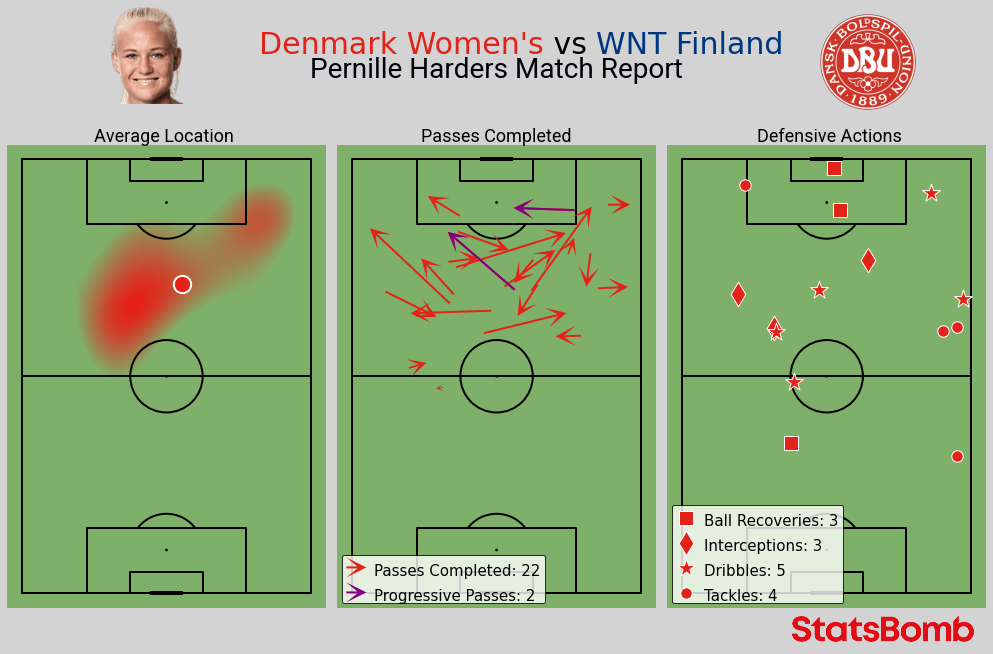

In [289]:
pitch = VerticalPitch(pitch_type='statsbomb',  line_zorder=2, line_color=linesColor, pitch_color=pitchColor)
fig, axs = pitch.grid(ncols=3, axis=False, endnote_height=0.05)
fig.set_facecolor("lightgrey")

axs["title"].text (0.15, 0.01, f"Average Location", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)

axs["title"].text (0.50, 0.01, f"Passes Completed", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)

axs["title"].text (0.85, 0.01, f"Defensive Actions", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)

average_location = pitch.scatter(harder_location.x_start, harder_location.y_start,
                           s=300,
                           marker= "o", color=hteamColor, edgecolors='#FFFFFF', linewidth=2, alpha=1,
                       ax=axs['pitch'][0], zorder=4)

kde = pitch.kdeplot(harderEvents.x, harderEvents.y, ax=axs['pitch'][0],
                    shade=True, levels=100,
                    shade_lowest=False,
                    cut=4.1, thresh=.5,
                    cmap = pitchCmap)


pitch.arrows(passHarder.x_start, passHarder.y_start,
             passHarder.x_end, passHarder.y_end, width=2,
             headwidth=10, headlength=10, color=hteamColor, ax=axs['pitch'][1], alpha = 1, 
             zorder= 2, label =f"Passes Completed: {countPassHarder}")

pitch.arrows(harderProg.x_start, harderProg.y_start,
             harderProg.x_end, harderProg.y_end, width=2,
             headwidth=10, headlength=10, color="purple", ax=axs['pitch'][1], alpha = 1, 
             zorder=2, label =f"Progressive Passes: {countProgHarder}")


scatter_recovery = pitch.scatter(BallRecovery.x, BallRecovery.y, c= hteamColor, edgecolor = "white",
                                 s=200, marker='s',  ax=axs['pitch'][2], 
                                 label = f"Ball Recoveries: {countBallRecovery}", zorder=2)

scatter_interception = pitch.scatter(Interception.x, Interception.y, c= hteamColor,
                                     s=300, marker='d', edgecolor = "white", ax=axs['pitch'][2], 
                                     label = f"Interceptions: {countInterception}", zorder=2)

scatter_dribble = pitch.scatter(Dribble.x, Dribble.y, c= hteamColor, edgecolor= "white",
                                s=350, marker='*',  ax=axs['pitch'][2], 
                                label = f"Dribbles: {countDribble}", zorder=2)

scatter_tackle = pitch.scatter(Tackle.x, Tackle.y, c=hteamColor, edgecolor= "white",
                               s=520, marker=".",  ax=axs['pitch'][2], 
                               label = f"Tackles: {countTackle}", zorder=2)


HighlightText(x=.25, y=19,
              s=f'<{hteam}> vs <{ateam}>', fontsize=30,
              highlight_textprops=[{"color": hteamColor},
                                   {"color": ateamColor}])


TITLE_STR1 = f'{MVPname}s Match Report'
title1_text = axs['title'].text(0.5, 0.7, TITLE_STR1, fontsize=28, color='#000009',
                               fontproperties=robotto_regular.prop,
                                ha='center', va='center')


legend = axs['pitch'][1].legend(loc='lower left', facecolor="white", edgecolor="black", labelspacing=1)
for text in legend.get_texts():
    text.set_fontsize(15)
    text.set_va('center')
    
legend = axs['pitch'][2].legend(loc='lower left', facecolor="white", edgecolor="black", labelspacing=1)
for text in legend.get_texts():
    text.set_fontsize(15)
    text.set_va('center')


pic = fig.add_axes([0.10, 0.87, 0.12, 0.15])
pic.axis('off')
pic.imshow(harderPic)

dbuPic = fig.add_axes([0.80, 0.86, 0.12, 0.15])
dbuPic.axis('off')
dbuPic.imshow(DBU)

sb_logo = fig.add_axes([0.75, 0.04, 0.25, 0.04])
sb_logo.axis('off')
sb_logo.imshow(im)


# plt.savefig(f'viz/{MVPname} Match Report vs {ateam} in {tournament}', dpi=300, bbox_inches='tight')